<br>
# Unsupervised Learning: K-means clustering using scikit-learn in Python

### <span style="color:red">This notebook was created using Python 2.7.12 | Anaconda 4.1.1 (64-bit) | Jupyter 4.2.1</span>
<br>
There are several clustering algorithms available in `sci-kit learn`. The simplest and most widely used algorithm is K-means. K-means groups (or clusters) data points that have similar properties into a user-specified number (k) of clusters. The algorithm finds the nearest cluster center (centroid) for each data point and assigns the data points closest to that cluster. Once all the data points have been assigned to clusters, the cluster centers are recomputed. This is repeated until most data points stick to the same cluster.

In [2]:
# show plots in the notebook
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data

To explain K-means I will use a simple example. The `adult_baby.csv` is a fictitious dataset I created to compare adults and babies. There are 20 observations in the data, each with a height and weight. The group variable represents whether the record belongs to an adult or baby (0=baby, 1=adult).

In [3]:
data = pd.read_csv('/Users/abeasock/Documents/Data/adult_baby.csv')

In [4]:
data.head()

,group,height,weight
0,0,22.8,12.3
1,0,28.0,19.2
2,1,68.3,134.0
3,0,21.4,7.6
4,1,64.2,125.8


`X_data` is our data with the attributes for clustering. `y_data` is our target. Generally unsupervised learning is used on unlabeled data (when a target is not known). However, for demonstration purposes I have included a target variable to show how well K-means performs on our data.

In [4]:
X_data = data.drop(['group'], axis=1)
y_data = data['group']

### Selecting the optimal number of clusters

The algorithm it clusters the data into k clusters, even if k is not the right number of clusters to use. So when using k-Means users need some way to determine whether they are using the right number of clusters. One method is called the elbow method. 

This method runs k-mean clustering on the data for a range of values of k. For example, below K-means is run on 1-10 clusters. Then look for elbow to pick the number of clusters, anything before the elbow the distances are too great and everything after the elbow the distances are too small between clusters.

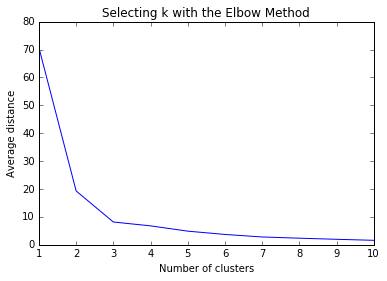

In [5]:
from scipy.spatial.distance import cdist
clusters=range(1,11)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assignment and append the mean distance my 
# taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_data)
    clusassign=model.predict(X_data)
    meandist.append(sum(np.min(cdist(X_data, model.cluster_centers_, 'euclidean'), axis=1))
    / X_data.shape[0])
    
"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
# pick the fewest number of clusters that reduces the average distance

We see a pretty clear elbow at k=3, indicating 3 is the best number of clusters. We know that this dataset only has two groups, but let's try using k=3 to see what it will give us.

### K-means clustering

In [24]:
np.random.seed(4352)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Because our data has a variable with groups we can check to see how well our K-means algorithm did at correctly labeling the groups. Being able to do a check like this is unusual because most of the time you will be working with unlabeled data.

In [25]:
# check how many of the samples were correctly labeled
correct_labels = sum(y_data == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_data.size))

Result: 17 out of 20 samples were correctly labeled.


### Scatter plot of clusters

Again since we know the real groups in the data we can plot this and compare it to the predicted clusters.

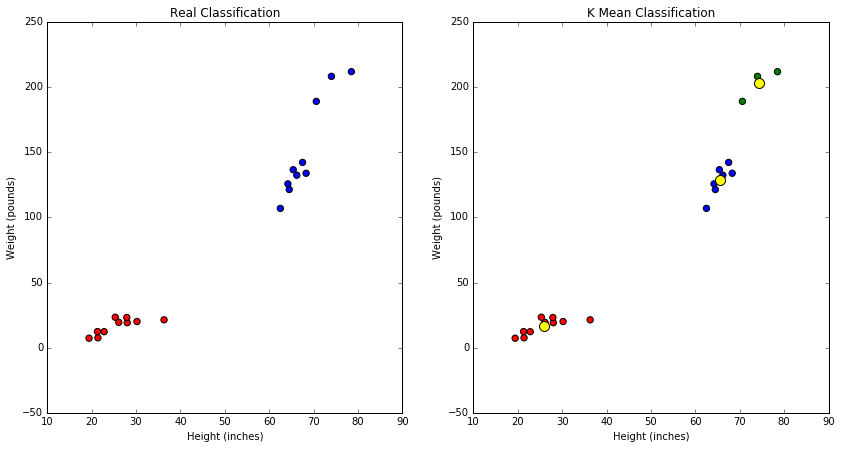

In [23]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'blue', 'green'])
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(data.height, data.weight, c=colormap[data.group], s=40)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(X_data.height, X_data.weight, c=colormap[labels], s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', s=100)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('K Mean Classification')

#### Change it to k=2

In [26]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [27]:
# check how many of the samples were correctly labeled
correct_labels = sum(y_data == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_data.size))

Result: 20 out of 20 samples were correctly labeled.


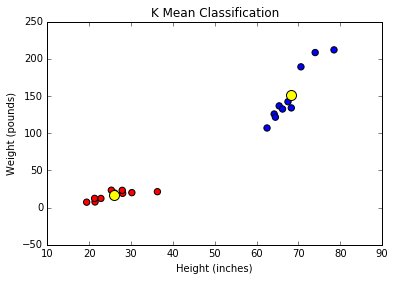

In [29]:
# View the results

# Plot Predicted with corrected values
plt.scatter(X_data.height, X_data.weight, c=colormap[labels], s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', s=100)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('K Mean Classification')